# Ocrpy Basic Usage Tutorial

In [1]:
from ocrpy import TextOcrPipeline
from pdf2image import convert_from_path
from ocrpy.experimental import DocumentClassifier
from ocrpy import DocumentReader, StorageWriter, TextParser, TableParser

/Users/rita/opt/anaconda3/lib/python3.8/site-packages/paddle/vision/transforms/functional_pil.py:36: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  'nearest': Image.NEAREST,
/Users/rita/opt/anaconda3/lib/python3.8/site-packages/paddle/vision/transforms/functional_pil.py:37: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  'bilinear': Image.BILINEAR,
/Users/rita/opt/anaconda3/lib/python3.8/site-packages/paddle/vision/transforms/functional_pil.py:38: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  'bicubic': Image.BICUBIC,
/Users/rita/opt/anaconda3/lib/python3.8/site-packages/paddle/vision/transforms/functional_pil.py:39: DeprecationWarning: BOX is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BOX instead.
  'box': Image.BO

## Fetch some sample Pdf and Image Data.

In [ ]:
# unzip the data
!unzip sample_data/data.zip -d sample_data/
!mkdir sample_data/output

In [2]:
# Setup the path for a sample pdf and image file and the parser backend
DOC_PATH = "sample_data/images/How to Become More Creative | Psychology Today_pages-to-jpg-0001.jpg"
PDF_PATH =  "sample_data/data/072201195875ImagePDF.pdf"
PARSER_BACKEND = "pytesseract"

/Users/rita/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Parse text Data from a single file and write to a local storage.


In [3]:
CREDENTIALS = {"AWS": "path/to/aws-credentials.env/file",
               "GCP": "path/to/gcp-credentials.json/file"}
               
reader = DocumentReader(file=DOC_PATH) # read image or pdf file
text_parser = TextParser(backend=PARSER_BACKEND, credentials={}) # Supported backends: pytesseract, google-cloud-vision, aws-textract. And you can also pass credentials for each backend if required.
parsed_text = text_parser.parse(reader) # parse the document using the selected parser backend.

writer = StorageWriter() # write to storage
writer.write(parsed_text, "sample_data/output/sample_image_output.json") # write the parsed text to storage

In [4]:
# extracted text from the image
from IPython.display import HTML, display
text_data = parsed_text[0]['text']
html_text = text_data.replace("\n", "<br>")
display(HTML(f"<table><tr><td><img src='sample_data/data/How to Become More Creative | Psychology Today_pages-to-jpg-0001.jpg' width='380px' hight='380px'/></td><td><p>{html_text}</p></td></tr></table>"))

/Users/rita/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"How to Become More Creative | Psychology Today 21/07/22, 9:06 PMHow to Become More CreativeBlessed are the creative, for they spark fresh choicesand new growth.Posted April14,2022 Reviewed by Michelle QuirkPeople often say, “I'm not creative. I’mjust not a creative person.” ~ But, instead of seeing creativity as allor none—I have it or | don’t have it—Source: Lisa Fotios/Pexels see creativity as a strength you cangrow or tap into at any moment. Youdo have the capacity for ingenuity, to solve problems in new ways, tocome up with new ideas, and to create things anew. Consider my friendJavier. Javier was stuck. He could feel his anxiety start to kick in. He was in ashort-story writing contest. There was one hour remaining. He had spentthe first two hours thinking of what to do. He knew he was forcing himselfto come up with the perfect story. He kept coming up empty. He thoughtto himself:Damn, here comes my heartbeat. It’s like it’s pounding out of my chest.Now my eyes are seeing black spots off to the side. It feels like I'm inatunnel. All | can see is the blank screen on my laptop. It’s all turningblack. He closed his eyes—more blackness.He'd been here before—writing contests and anxiety. He gasped for ahttps://www.psychology today. com/intl/blog/what-matters-most/202204/how-become-more-creative Page 1013"


### Parse Table Data from a single file and write to a local storage.


In [5]:
aws_config = "../notebooks/local/aws_keys.env"

reader = DocumentReader(file=PDF_PATH) # read document

table_parser = TableParser(credentials=aws_config) # Table parser
parsed_table = table_parser.parse(reader,  attempt_csv_conversion=True) # parse the document using the selected parser backend.

#### parsed table is a dictionary of pandas dataframes. (each item represents an individual table in a pdf document)

In [6]:
for page, tables in parsed_table.items():
    print(f"Page {page} has {len(tables)} tables")

Page 0 has 0 tables
Page 1 has 2 tables


/Users/rita/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Here, Page 1 of the pdf document contains two tables.

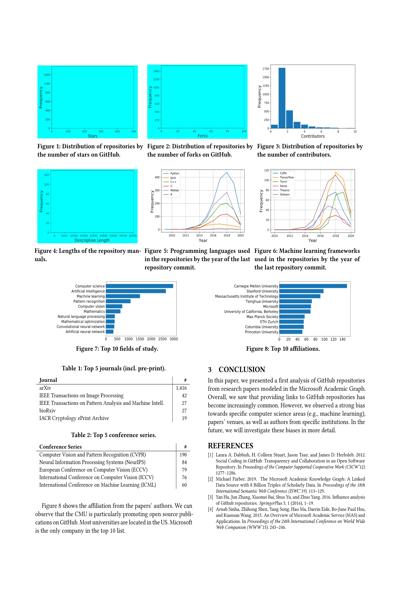

In [7]:
pages = convert_from_path(PDF_PATH, 300)
pages[1].resize((400, 600))

In [8]:
table_1 = parsed_table[1][0].to_html()
table_2 = parsed_table[1][1].to_html()
display(HTML(f"<table></tr><tr><td><p>Table 1</p>{table_1}</td><td style='vertical-align: top;'><p>Table 2</p>{table_2}</td></tr></table>"))

/Users/rita/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1
0,Journal,#
1,arXiv,"1,416"
2,IEEE Transactions on Image Processing,42
3,IEEE Transactions on Pattern Analysis and Machine Intell.,27
4,bioRxiv,27
5,IACR Cryptology ePrint Archive,19
,0,1
0,Conference Series,#
1,Computer Vision and Pattern Recognition (CVPR),190
2,Neural Information Processing Systems (NeurIPS),84


## Text extraction via Pipeline API.

In [9]:
SOURCE = 'sample_data/data' # s3 bucket or local directory or gcs bucket with your documents.
DESTINATION = 'sample_data/output/' # s3 bucket or local directory or gcs bucket to write the processed documents.
PARSER = 'pytesseract' # or 'google-cloud-vision' or 'pytesseract'
CREDENTIALS = {"AWS": "path/to/aws-credentials.env/file",
               "GCP": "path/to/gcp-credentials.json/file"} # optional - if you are using any cloud service.

pipeline = TextOcrPipeline(source_dir=SOURCE, destination_dir=DESTINATION,
                           parser_backend=PARSER, credentials_config=CREDENTIALS)
pipeline.process()

/Users/rita/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running Pipeline with the following configuration:

1. DOCUMENT_SOURCE: data
2. DOCUMENT_DESTINATION: output
3. SOURCE_STORAGE_TYPE: LOCAL
4. DESTINATION_STORAGE_TYPE: LOCAL
5. PARSER_BACKEND_TYPE: pytesseract
6. TOTAL_DOCUMENT_COUNT: 11
7. IMAGE_FILE_COUNT: 5
8. PDF_FILE_COUNT: 5
9. CREDENTIALS: {'AWS': 'path/to/aws-credentials.env/file', 'GCP': 'path/to/gcp-credentials.json/file'}


0it [00:00, ?it/s]

FILE: .DS_Store - ERROR: 'FileTypeNotSupported' object is not iterable


11it [07:37, 41.55s/it]


### Document Classification

In [10]:
DOC_1 = "sample_data/images/lm_model.png"
DOC_2 = "sample_data/images/invoice_pages-to-jpg-0001.jpg"

classifier = DocumentClassifier()
for i in [DOC_1, DOC_2]:
    reader = DocumentReader(i) 
    doc_types = classifier.predict(reader)
    display(HTML(f"<table><tr><p>File Name: {i}</p><p>Predicted Type: <b>{doc_types[0]}</b></p><td><img src='{i}' width='380px' hight='380px'/></td></tr></table>"))

/Users/rita/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/rita/opt/anaconda3/lib/python3.8/site-packages/transformers/models/beit/feature_extraction_beit.py:77: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  resample=Image.BICUBIC,


""


""


### Document Layout Parser

In [14]:
from ocrpy.experimental import DocumentLayoutParser

DOC_1 = "sample_data/images/lm_model.png"
reader = DocumentReader(file=DOC_1)
text_parser = TextParser()

layout_parser = DocumentLayoutParser()
result = layout_parser.parse(reader, text_parser)

In [15]:
import cv2
from PIL import Image

image = cv2.imread(DOC_1)

def draw_blocks(image, result):
    for block in result[0]['blocks']:
        region = block['region']
        block_type = block['meta_data']['type']
        x1,y1, x2,y2 = region['x1'], region['y1'], region['x2'], region['y2']
        image = cv2.rectangle(image, (x1, y1), (x2, y2 ), (41,128,228), 1)
        cv2.putText(image, block_type, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (17,51,95), 2)
    pil_image=Image.fromarray(image)
    return pil_image

/Users/rita/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


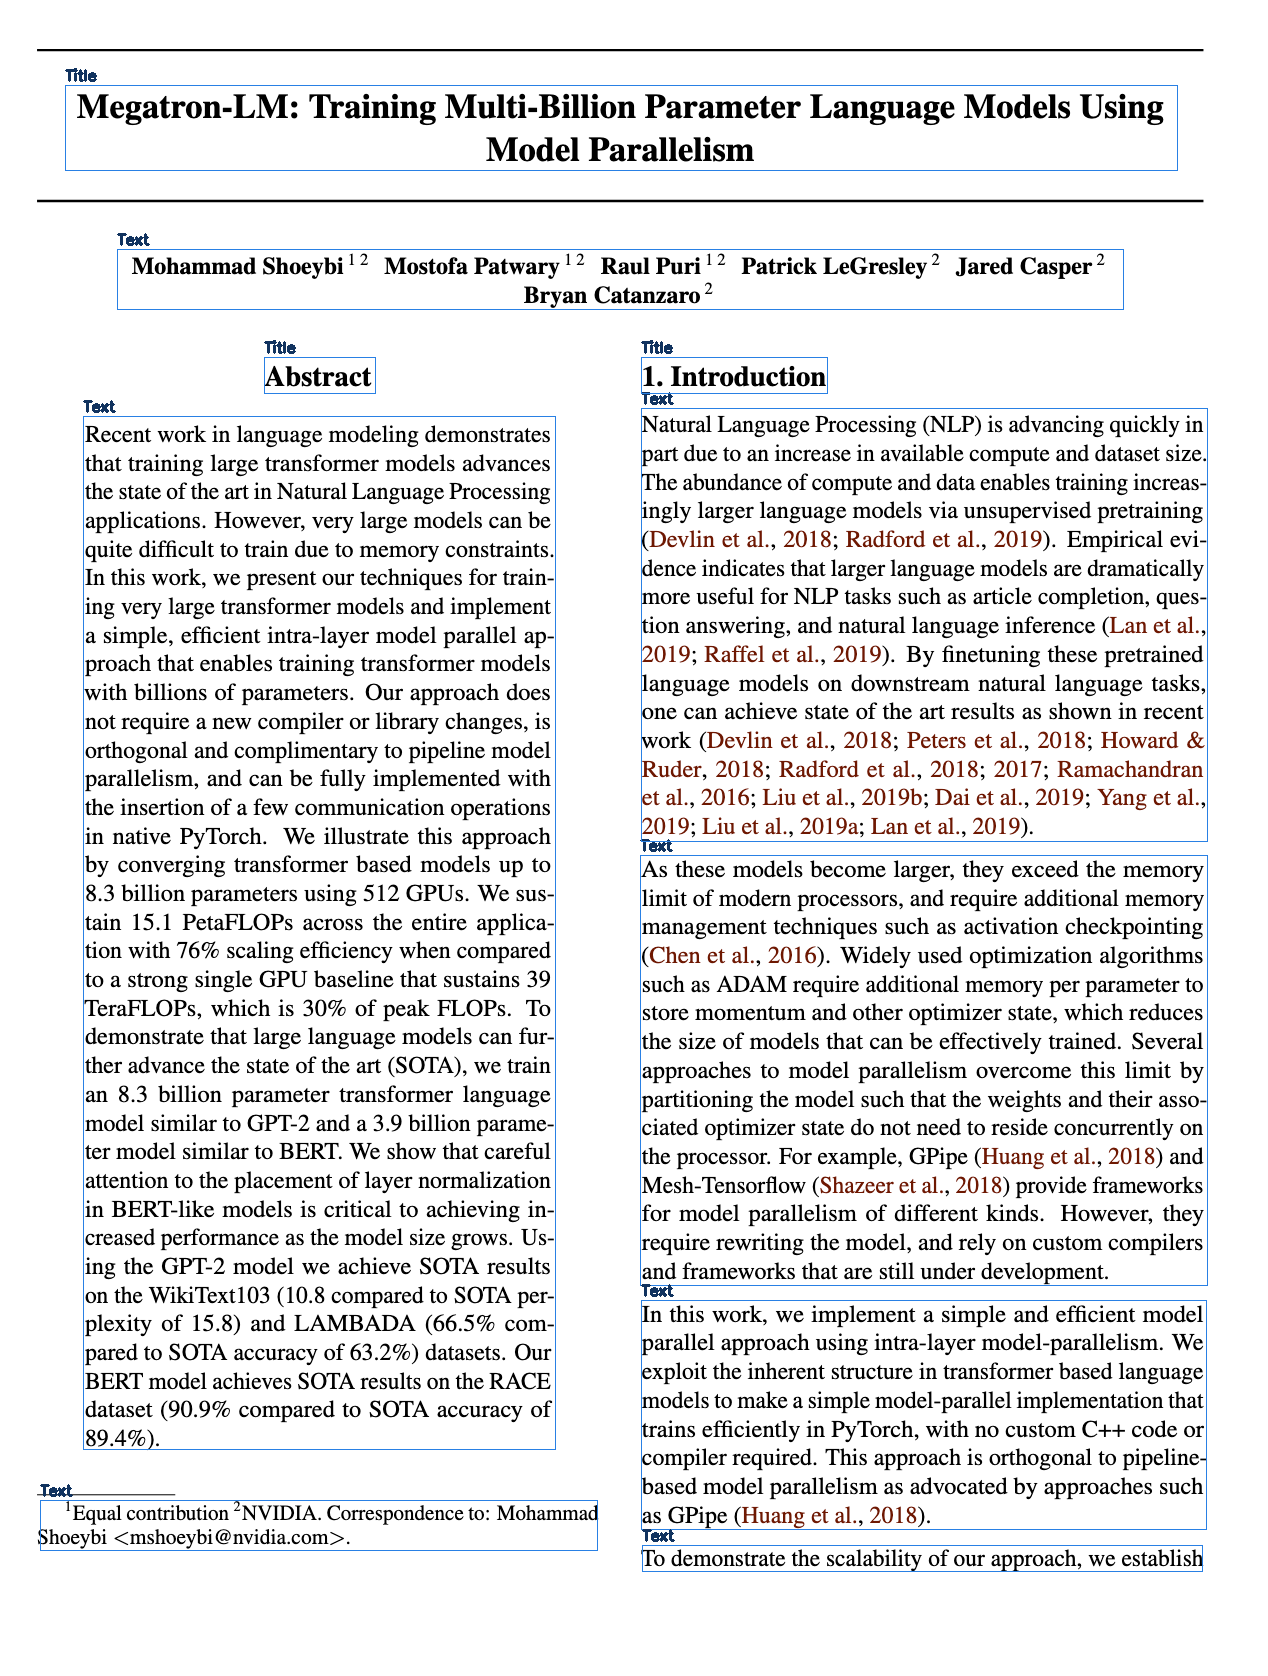

In [16]:
draw_blocks(image, result)